In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns

# Define the API endpoint and parameters
url = "https://api.fda.gov/food/enforcement.json?search=report_date:[20200101+TO+20240804]&limit=500"

# Send a GET request to the API
response = requests.get(url)


# Check if the request was successful
if response.status_code == 200:
    # Parse the JSON data
    data = response.json()
    
    # Extract the list of results (recalls)
    recalls = data.get('results', [])
    
    # Create a DataFrame from the list of recall records
    recall_df = pd.DataFrame(recalls)
    
    # Save the DataFrame to a CSV file
    recall_df.to_csv('output_data/fda_food_enforcement_data.csv', index=False)

In [2]:

clean_df = recall_df.rename(columns={"status": "Status", 
                                     "city": "City",
                                     "state": "State",
                                     "country":"Country",
                                     "classification":"Classification",
                                     "openfda":"Open FDA",
                                     "product_type":"Product Type",
                                     "event_id":"Event ID",
                                     "recalling_firm":"Recalling Firm",
                                     "address_1":"Address 1",
                                     "address_2":"Address 2",
                                     "postal_code":"Postal Code",
                                     "voluntary_mandated":"Voluntary Mandated",
                                     "initial_firm_notification":"Initial Firm Notification",
                                     "distribution_pattern":"Distribution Pattern",
                                     "recall_number":"Recall Number",
                                     "product_description":"Product Description",
                                     "product_quantity":"Product Quantity",
                                     "reason_for_recall":"Reason for Recall",
                                     "recall_initiation_date":"Recall Initiation Date",
                                     "center_classification_date":"Center Classification Date",
                                     "termination_date":"Termination Date",
                                     "report_date":"Report Date",
                                     "code_info":"Code Info",
                                     "more_code_info":"More Code Info",
                                    
                                     })

clean_df.head()

,Status,City,State,Country,Classification,Open FDA,Product Type,Event ID,Recalling Firm,Address 1,...,Recall Number,Product Description,Product Quantity,Reason for Recall,Recall Initiation Date,Center Classification Date,Termination Date,Report Date,Code Info,More Code Info
0,Terminated,Rancho Dominguez,CA,United States,Class III,{},Food,85253,"Organic By Nature, Inc.",2610 Homestead Pl,...,F-0904-2020,Pure Planet Organic Parasite Cleanse; Net Wt....,xx,Firm was notified by supplier that Organic Gro...,20200224,20200413,20210202,20200401,Lot codes: 72746,
1,Terminated,Brooklyn,NY,United States,Class III,{},Food,85364,Rong Shing Trading NY Inc,47 Bridgewater St # 57,...,F-0921-2020,"XinXing Dried Plum, Net Wt. 5.3 oz.(150g)",unknown,"Product contains dried peaches, but front labe...",20200401,20200424,20210318,20200506,UPC CODE: 6868978724496 BEST BEFORE: 11/15/2021,NaN
2,Terminated,Monterey,CA,United States,Class I,{},Food,89381,Dole Fresh Vegetables Inc,2959 Salinas Hwy,...,F-0757-2022,Marketside 12oz Classic Salad UPC:6-81131-328...,,Harvest equipment used in harvesting raw icebe...,20220106,20220222,20220322,20220302,Product codes beginning with B - Best by Dates...,
3,Terminated,Lovell,WY,United States,Class II,{},Food,90158,"Queen Bee Gardens, LLC",262 E Main St,...,F-1472-2022,Honey Caramels Blue Raspberry. Product availab...,171 pieces,Products may potentially contain one or more o...,20220428,20220719,20230117,20220727,None,NaN
4,Terminated,Nof Ha-Galil,,Israel,Class I,{},Food,90105,ELITE CONFECTIONERY LTD,Nazareth-Ilit,...,F-1233-2022,ELITE MILK CHOCOLATE COATED RICE CAKES UPC:81...,unknown,Potential contamination with Salmonella,20220428,20220604,20221103,20220615,All lots,


## Which firms have the most recalls?

In [3]:
recalling_firm_df = clean_df["Recalling Firm"].unique()

recalling_firm_count_df = len(recalling_firm_df)

#print(recalling_firm_count_df)
print("Total amount of unique Recalling Firms associated to the FDA Recalls is "  + str(recalling_firm_count_df) )

Total amount of unique Recalling Firms associated to the FDA Recalls is 295


In [4]:
# Get top 15 recalling firms
firm_count_df = clean_df["Recalling Firm"].value_counts().head(15)

print(firm_count_df)

Recalling Firm
FRESH IDEATION FOOD GROUP, LLC dba Fresh Creative Cuisine    34
Newly Weds Foods, Inc.                                       13
Fresh Express Incorporated                                    9
Vitality Works, Inc                                           9
Wegmans Food Markets, Inc.                                    6
ELITE CONFECTIONERY LTD                                       6
The JM Smucker Company LLC                                    6
Giant Eagle                                                   6
Lemonland Food Corp                                           6
Lyons Magnus, Inc                                             6
Banner Smoked Fish Inc.                                       5
Renaissance Food Group                                        5
ICE CREAM HOUSE                                               5
Abbott Laboratories                                           5
Dole Fresh Vegetables Inc                                     5
Name: count, dtype: int64

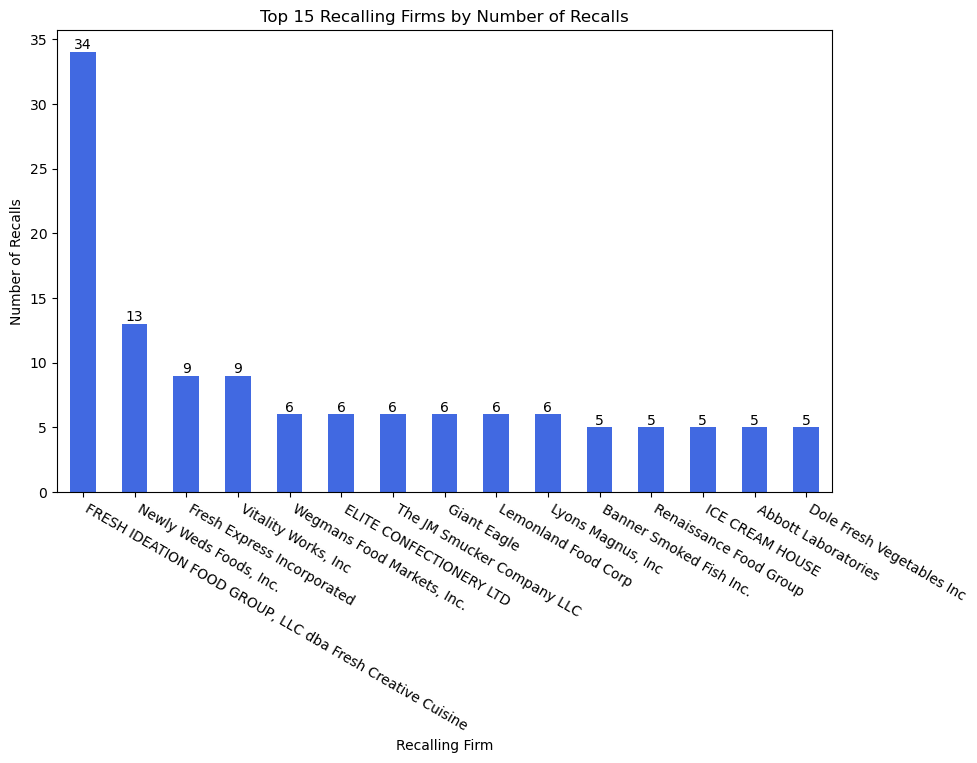

In [5]:
# Plot the number of recalls by the top 15 recalling firms
ax = firm_count_df.plot(kind="bar", 
                   color = "royalblue",
                   figsize=(10, 6), 
                   title="Top 15 Recalling Firms by Number of Recalls")
plt.xlabel("Recalling Firm")
plt.ylabel("Number of Recalls")
plt.xticks(rotation=-30, ha="left")

for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        # Determine the label position: top or bottom of the bar
        if height > 0:
            y_offset = height  
            va = "bottom"  
        else:
            y_offset = height 
            va = "top"  
        
        # Add a text label, formatted to two decimal places
        ax.text(bar.get_x() + bar.get_width() / 2, y_offset, 
                f'{height}', 
                ha="center", va=va)


plt.savefig("output_data/Top 15 Recalling Firms by Number of Recalls.png")
plt.show()


In [6]:
# Get the top 15 recalling firms
top_firms = clean_df["Recalling Firm"].value_counts().head(15).index

# Filter the dataset to include only the top 15 firms
filtered_df = clean_df[clean_df["Recalling Firm"].isin(top_firms)]

# Group the data by firm and status
grouped_data = filtered_df.groupby(["Recalling Firm", 'Classification']).size().unstack(fill_value=0)

# Create a single subplot
fig = go.Figure()

# Stacked bar plot for status breakdown
for status in grouped_data.columns:
    fig.add_trace(
        go.Bar(x=grouped_data.index, y=grouped_data[status], name=status)
    )

# Update layout for a better presentation
fig.update_layout(
    barmode="stack",
    height=700,
    width=1000,
    title_text="Classification Breakdown by Top 15 Recalling Firms",
    showlegend=True
)

fig.update_xaxes(title_text="Recalling Firm")

#Time it takes to close a recall - Manuel

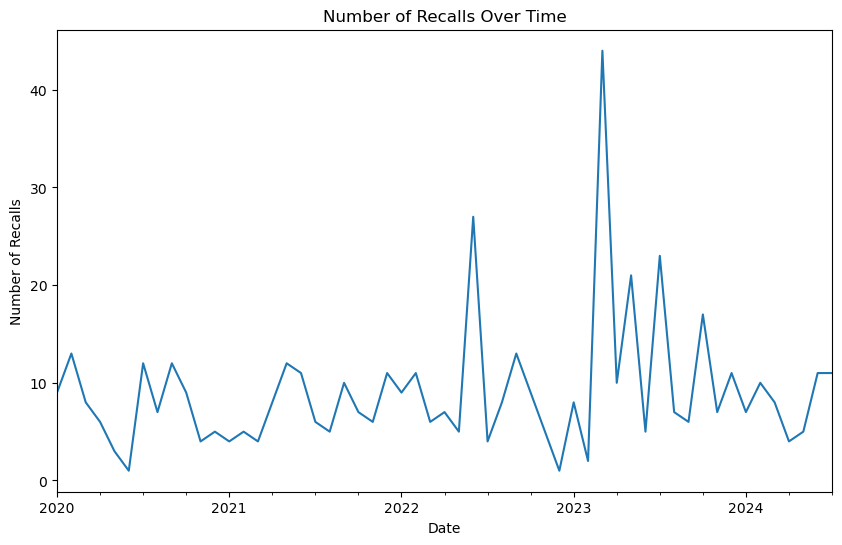

In [7]:
# Load the dataset
df = pd.read_csv('output_data/fda_food_enforcement_data.csv')

# Convert report_date to datetime format
df['report_date'] = pd.to_datetime(df['report_date'], format='%Y%m%d')

# Group by year and month, then count the number of recalls
recall_trends = df.groupby(df['report_date'].dt.to_period('M')).size()

# Plot the recall trends over time
recall_trends.plot(kind='line', figsize=(10, 6), title='Number of Recalls Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Recalls')
plt.show()

In [8]:
# Group by year and classification, then count the number of recalls
recall_trends_yearly = df.groupby([df['report_date'].dt.year, 'classification']).size().unstack(fill_value=0)
recall_trends_yearly

classification,Class I,Class II,Class III
report_date,,,
2020,29,52,8
2021,30,58,1
2022,62,40,3
2023,90,60,11
2024,18,36,2


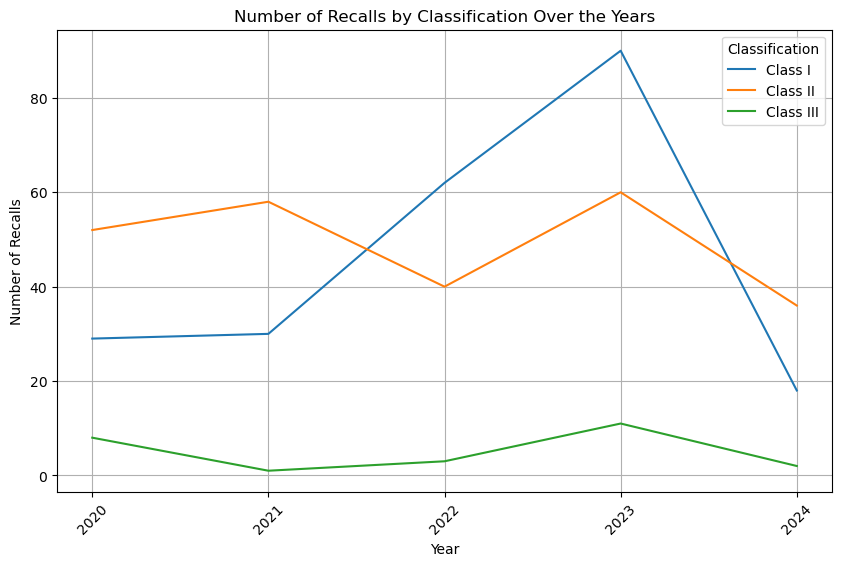

In [9]:
# Load the dataset
df = pd.read_csv('output_data/fda_food_enforcement_data.csv')

# Convert report_date to datetime format
df['report_date'] = pd.to_datetime(df['report_date'], format='%Y%m%d')

# Group by year and classification, then count the number of recalls
recall_trends_yearly = df.groupby([df['report_date'].dt.year, 'classification']).size().unstack(fill_value=0)

# Plot the recall trends over the years with different lines for each classification
plt.figure(figsize=(10, 6))
for classification in recall_trends_yearly.columns:
    plt.plot(recall_trends_yearly.index, recall_trends_yearly[classification], label=classification)

plt.title('Number of Recalls by Classification Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Recalls')
plt.xticks(recall_trends_yearly.index, rotation=45)
plt.legend(title='Classification')
plt.grid(True)
plt.savefig("output_data/Number of Recalls by Class.png")
plt.show()

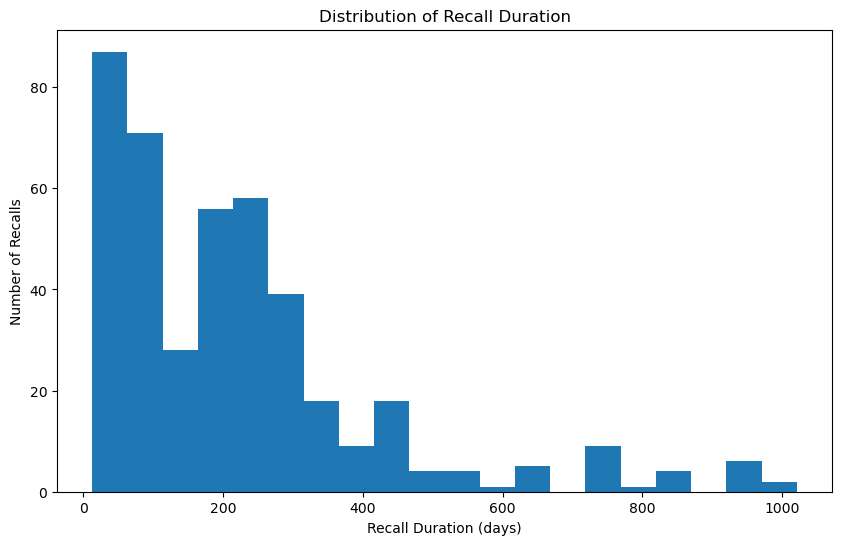

In [10]:
df['recall_initiation_date'] = pd.to_datetime(df['recall_initiation_date'], format='%Y%m%d')
df['termination_date'] = pd.to_datetime(df['termination_date'], format='%Y%m%d')

# Calculate the duration of each recall
df['recall_duration'] = (df['termination_date'] - df['recall_initiation_date']).dt.days

# Plot the distribution of recall durations
df['recall_duration'].plot(kind='hist', bins=20, figsize=(10, 6), title='Distribution of Recall Duration')
plt.xlabel('Recall Duration (days)')
plt.ylabel('Number of Recalls')
plt.savefig("output_data/Recall Duration_Combined.png")
plt.show()

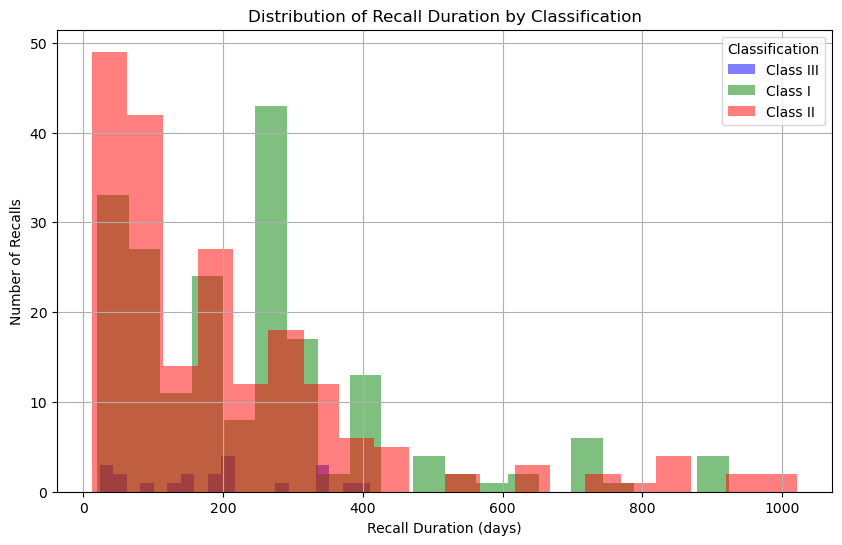

In [11]:
df['recall_initiation_date'] = pd.to_datetime(df['recall_initiation_date'], format='%Y%m%d')
df['termination_date'] = pd.to_datetime(df['termination_date'], format='%Y%m%d')

# Calculate the duration of each recall
df['recall_duration'] = (df['termination_date'] - df['recall_initiation_date']).dt.days

# Plot the distribution of recall durations by classification
plt.figure(figsize=(10, 6))

# Plot each classification with a different color
for classification, color in zip(df['classification'].unique(), ['blue', 'green', 'red']):
    subset = df[df['classification'] == classification]
    plt.hist(subset['recall_duration'].dropna(), bins=20, alpha=0.5, color=color, label=classification)

# Adding labels and title
plt.title('Distribution of Recall Duration by Classification')
plt.xlabel('Recall Duration (days)')
plt.ylabel('Number of Recalls')
plt.legend(title='Classification')
plt.grid(True)
plt.savefig("output_data/Recall Duration_Classification.png")
plt.show()

In [12]:
# Calculate the average recall duration by classification
average_recall_duration_by_classification = df.groupby('classification')['recall_duration'].mean()

# Convert the series to a DataFrame and reset the index
average_recall_duration_df = average_recall_duration_by_classification.reset_index()

# Rename the columns for clarity
average_recall_duration_df.columns = ['Classification', 'Average Recall Duration']

# Display the resulting DataFrame
print(average_recall_duration_df)

  Classification  Average Recall Duration
0        Class I               240.333333
1       Class II               207.791045
2      Class III               192.428571


## Which States are impacted by recalls?

In [13]:
# Remove rows with blank states
clean_df = clean_df[clean_df['State'].str.strip() != '']
states_impacted = clean_df['State'].unique()
states_impactedcount = len(states_impacted)
time_period = clean_df['Report Date'].unique()

time_period_dates = pd.to_datetime(time_period)

# Sort dates
time_period_dates = time_period_dates.sort_values()

earliest_date = time_period_dates[0]
latest_date = time_period_dates[-1]

# Print the earliest and latest dates 
print(f"Earliest Date: {earliest_date.strftime('%B %Y')}")
print(f"Latest Date: {latest_date.strftime('%B %Y')}")


print(states_impacted)
print(str(states_impactedcount) + ' States Impacted by FDA Recalls' + ' '+'between ' + earliest_date.strftime('%B %Y') + ' to ' + latest_date.strftime('%B %Y'))

Earliest Date: January 2020
Latest Date: July 2024
['CA' 'NY' 'WY' 'AZ' 'OH' 'MS' 'MD' 'KS' 'MA' 'IL' 'SC' 'MI' 'NJ' 'FL'
 'NM' 'TX' 'GA' 'WI' 'WA' 'PA' 'MN' 'ID' 'NV' 'OR' 'IA' 'N/A' 'VT' 'MO'
 'UT' 'CT' 'VA' 'NE' 'DE' 'IN' 'AR' 'KY' 'CO' 'NC' 'NH' 'OK' 'AL' 'PR'
 'ND']
43 States Impacted by FDA Recalls between January 2020 to July 2024


## Which states are most frequently impacted by product recalls?

In [14]:
# Get the count of recalls for each state
state_counts = clean_df['State'].value_counts()


print(state_counts)

# The top 5 most impacted states
most_impacted_states = state_counts.head(5).index.tolist()

print(most_impacted_states)

State
CA     55
NY     47
OH     41
MD     39
IL     31
FL     29
WA     21
GA     21
PA     14
TX     14
OR     14
NJ     13
MN     13
MI     12
MA     11
WI     11
NM      9
VT      8
UT      8
VA      8
NC      7
ID      7
IA      6
KS      6
AZ      6
IN      5
MO      4
CT      4
CO      4
WY      4
NH      3
N/A     3
PR      2
SC      2
AR      2
NV      1
AL      1
OK      1
DE      1
KY      1
NE      1
MS      1
ND      1
Name: count, dtype: int64
['CA', 'NY', 'OH', 'MD', 'IL']


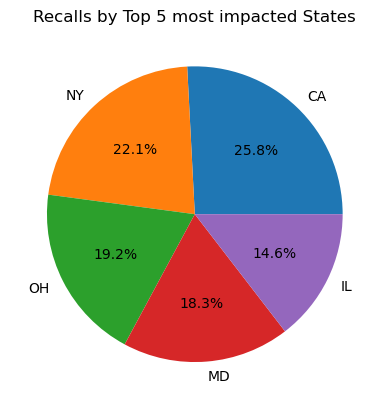

In [15]:
# Get the top 5 most impacted states
top_states = most_impacted_states[:5]

# Get the count of recalls for each state
state_counts = clean_df['State'].value_counts()

# Filter the state counts for the top 5 states
top_state_counts = state_counts[state_counts.index.isin(top_states)]

# Plot 
plt.pie(top_state_counts, labels=top_states, autopct='%1.1f%%')
plt.title('Recalls by Top 5 most impacted States')
plt.show()

In [16]:
## Most Prevelant Classes in Top 5 Recall States

most_prevalent_classes = {}

# Loop through each state in most_impacted_states
for state in most_impacted_states:
    # Filter the DataFrame for the current state
    state_df = clean_df[clean_df['State'] == state]
    
    # Get the counts of each class in the current state
    class_counts = state_df['Classification'].value_counts()
    
    # Find the most common class and its count
    most_common_class = class_counts.idxmax()
    most_common_class_count = class_counts.max()

    # Calculate the total count of all classes
    total_class_count = class_counts.sum()
    
    
    most_prevalent_classes[state] = {
        'most_common_class': most_common_class,
        'most_common_class_count': most_common_class_count,
        'total_class_count': total_class_count
    }


print(most_prevalent_classes)

{'CA': {'most_common_class': 'Class I', 'most_common_class_count': 27, 'total_class_count': 55}, 'NY': {'most_common_class': 'Class I', 'most_common_class_count': 22, 'total_class_count': 47}, 'OH': {'most_common_class': 'Class II', 'most_common_class_count': 23, 'total_class_count': 41}, 'MD': {'most_common_class': 'Class I', 'most_common_class_count': 35, 'total_class_count': 39}, 'IL': {'most_common_class': 'Class I', 'most_common_class_count': 20, 'total_class_count': 31}}


<Figure size 1200x800 with 0 Axes>

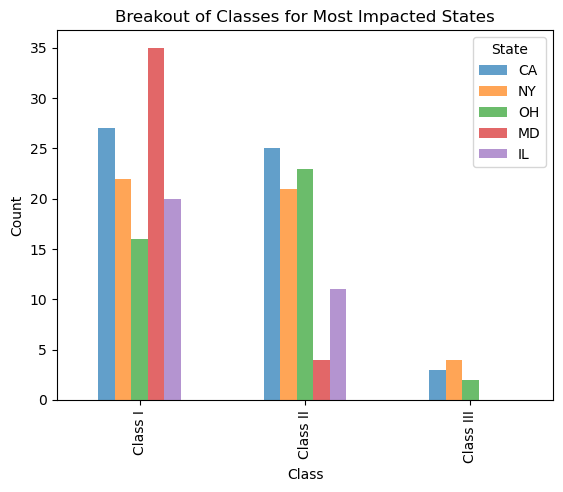

In [17]:
# Get the most prevalent classes for each state
most_prevalent_classes = ['Class I', 'Class II', 'Class III']

# Create a dictionary to store the class counts for each state
class_counts_by_state = {}

# Loop 
for state in most_impacted_states:
    # Filter the DataFrame 
    state_df = clean_df[clean_df['State'] == state]
    
    # Get the counts of each class in the current state
    class_counts = state_df['Classification'].value_counts()
    
    # Filter the class counts for the most prevalent classes
    class_counts = class_counts[class_counts.index.isin(most_prevalent_classes)]
    
    # Store the class counts 
    class_counts_by_state[state] = class_counts


class_counts_df = pd.DataFrame(class_counts_by_state).fillna(0)

# Plot 
plt.figure(figsize=(12, 8))
class_counts_df.plot(kind='bar', alpha=0.7)
plt.title('Breakout of Classes for Most Impacted States')
plt.xlabel('Class')
plt.ylabel('Count')
plt.legend(title='State')
plt.show()

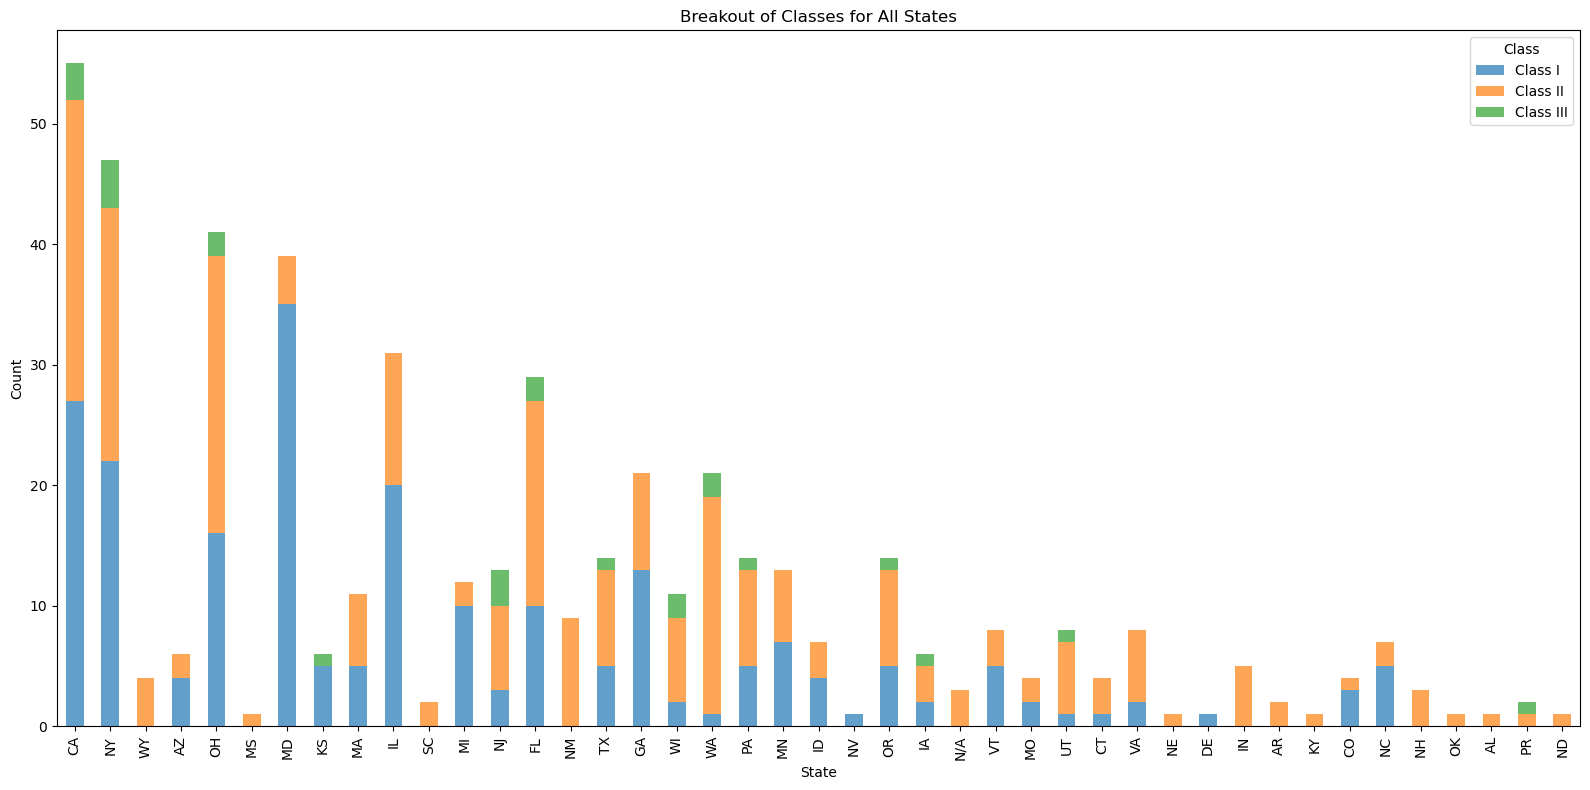

In [18]:
# Get the most prevalent classes for each state
most_prevalent_classes = ['Class I', 'Class II', 'Class III']

# Create a dictionary to store the class counts for each state
class_counts_by_state = {}

# Loop through each unique state in the DataFrame
for state in clean_df['State'].unique():
    # Filter the DataFrame for the current state
    state_df = clean_df[clean_df['State'] == state]
    
    # Get the counts of each class in the current state
    class_counts = state_df['Classification'].value_counts()
    
    # Filter the class counts for the most prevalent classes
    class_counts = class_counts[class_counts.index.isin(most_prevalent_classes)]
    
    # Store the class counts in the dictionary
    class_counts_by_state[state] = class_counts

# Convert the dictionary to a DataFrame
class_counts_df = pd.DataFrame(class_counts_by_state).fillna(0)

# Plot 
class_counts_df.T.plot(kind='bar', stacked=True, figsize=(16, 8), alpha=0.7)
plt.title('Breakout of Classes for All States')
plt.xlabel('State')
plt.ylabel('Count')
plt.legend(title='Class')
plt.tight_layout()
plt.show()

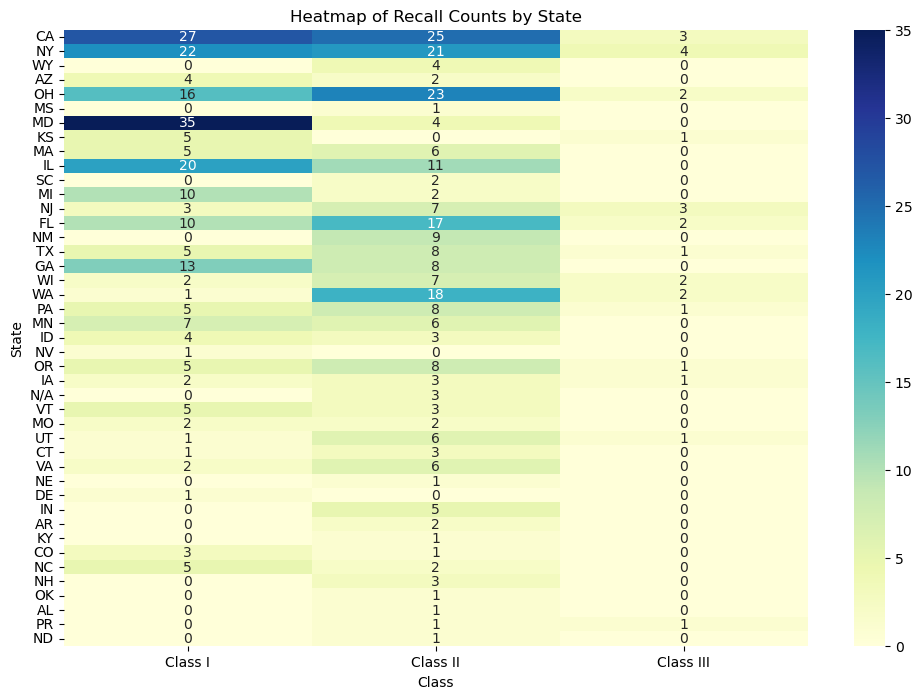

In [19]:
# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(class_counts_df.T, annot=True, cmap='YlGnBu', fmt='g')
plt.title('Heatmap of Recall Counts by State')
plt.xlabel('Class')
plt.ylabel('State')
plt.show()

In [20]:
classification_counts = clean_df['Classification'].value_counts()

    # Display the classification counts
print(classification_counts)

Classification
Class II     245
Class I      222
Class III     25
Name: count, dtype: int64


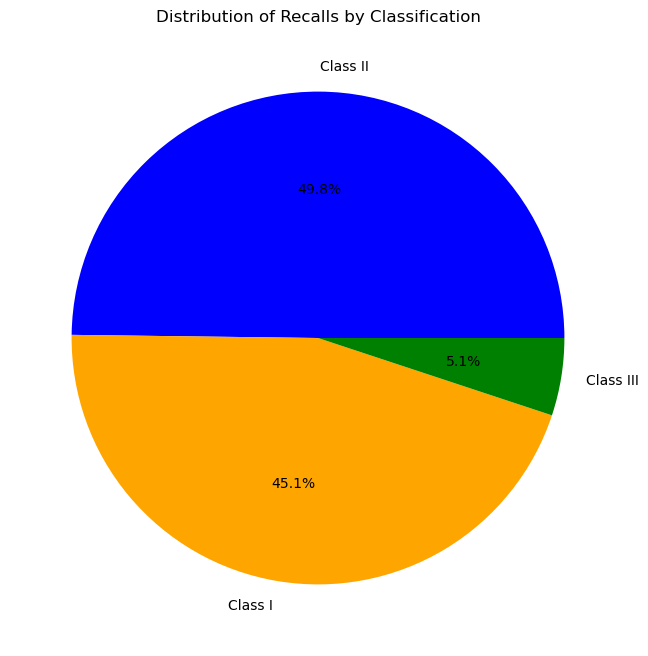

In [21]:
plt.figure(figsize=(8, 8))
plt.pie(classification_counts, labels=classification_counts.index, autopct='%1.1f%%', colors=['blue', 'orange', 'green'])
plt.title('Distribution of Recalls by Classification')
plt.show()
clean_df['Report Year'] = pd.to_datetime(clean_df['Report Date']).dt.year
    
    # Count recalls by classification and company
classification_company_counts = clean_df.groupby(['Classification', 'Recalling Firm']).size().unstack(fill_value=0)
    

Recall counts by Classification and Year:
Report Year     2020  2021  2022  2023  2024
Classification                              
Class I           29    30    56    89    18
Class II          52    58    40    59    36
Class III          8     1     3    11     2


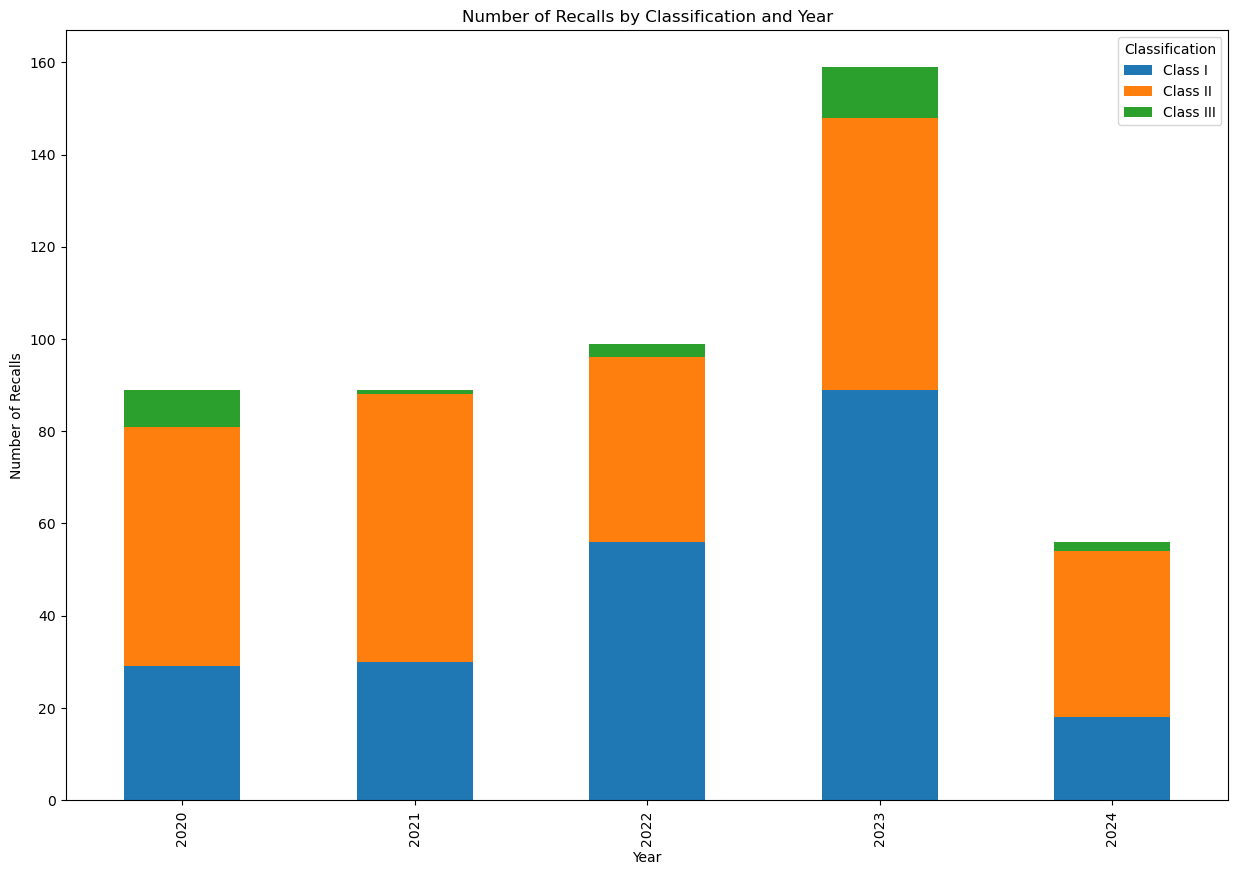

In [22]:
# Count recalls by classification and year
# Extract year from report_date
clean_df['Report Year'] = pd.to_datetime(clean_df['Report Date']).dt.year
    
    # Group by Classification and Report Year, and count the occurrences
classification_year_counts = clean_df.groupby(['Classification', 'Report Year']).size().unstack(fill_value=0)
    
    # Display the counts in the console
print("Recall counts by Classification and Year:")
print(classification_year_counts)
    
    # Plot classification and year relationship
classification_year_counts.T.plot(kind='bar', stacked=True, figsize=(15, 10))
plt.title('Number of Recalls by Classification and Year')
plt.xlabel('Year')
plt.ylabel('Number of Recalls')
plt.legend(title='Classification')
plt.show()

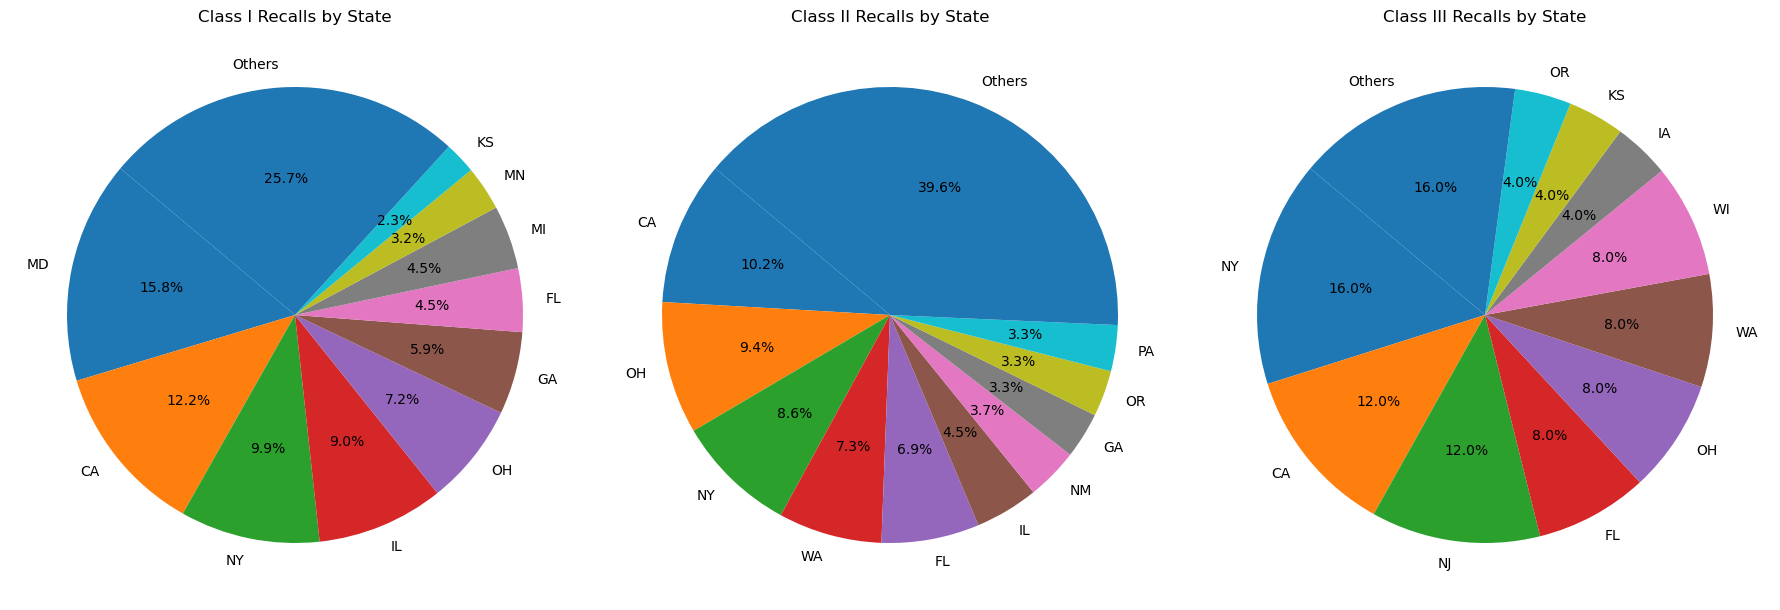

In [23]:
# Group by Classification and State, and count the occurrences
classification_state_counts = clean_df.groupby(['Classification', 'State']).size().unstack(fill_value=0)
    
    # Function to prepare data for pie chart with top 10 states and "Others"
def prepare_pie_data(data):
        top_10 = data.nlargest(10)
        others = pd.Series(data.sum() - top_10.sum(), index=['Others'])
        return pd.concat([top_10, others])
    
    # Plot pie charts for each classification
classifications = ['Class I', 'Class II', 'Class III']
    
plt.figure(figsize=(18, 6))  # Adjust the size to fit three pie charts
    
for i, classification in enumerate(classifications):
        plt.subplot(1, 3, i + 1)
        if classification in classification_state_counts.index:
            pie_data = prepare_pie_data(classification_state_counts.loc[classification])
            pie_data.plot(kind='pie', autopct='%1.1f%%', startangle=140)
            plt.title(f'{classification} Recalls by State')
            plt.ylabel('')  # Remove the y-label to clean up the plot
    
plt.tight_layout()
plt.show()